## Get Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
np.random.seed(42)

In [4]:
filePath = f"/cxldata/datasets/project/bikes.csv"

In [5]:
bikesData = pd.read_csv(filePath)

In [6]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## EDA

In [7]:
for column in bikesData.columns:
    print(column," : ",len(bikesData[column].unique()))

instant  :  17379
dteday  :  731
season  :  4
yr  :  2
mnth  :  12
hr  :  24
holiday  :  2
weekday  :  7
workingday  :  2
weathersit  :  4
temp  :  50
atemp  :  65
hum  :  89
windspeed  :  30
casual  :  322
registered  :  776
cnt  :  869


In [8]:
bikesData["weathersit"].unique()

array([1, 2, 3, 4])

In [9]:
bikesData.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
bikesData.shape

(17379, 17)

In [11]:
bikesData["yr"].unique()

array([0, 1])

In [12]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
bikesData.head(50)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


## Clean Data

In [14]:
columnsToDrop = ["instant", "dteday", "atemp", "casual", "registered"]

In [15]:
bikesData.drop(columns=columnsToDrop,inplace=True)

In [16]:
bikesData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


## Train - Test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

In [19]:
train_set,test_set = train_test_split(bikesData,test_size=0.3,random_state=42)

In [20]:
train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)

In [21]:
print("train - ", train_set.shape[0])
print("test - ", test_set.shape[0])

train -  12165
test -  5214


In [22]:
def display_scores(scores):
    print("Scores: \n", scores, "\n ------------------------------------------------------------" )
    print("Mean: \n", scores.mean(), "\n ------------------------------------------------------------")
    print("Standard deviation: \n", scores.std(), "\n ------------------------------------------------------------")

## Feature Scale the Dataset

In [23]:
columnsToScale = ['temp', 'hum', 'windspeed']

In [24]:
scaler = StandardScaler()

In [25]:
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])

In [26]:
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])

In [27]:
display_scores(train_set[columnsToScale])

Scores: 
            temp       hum  windspeed
1     -1.440143  0.892500  -1.552670
2     -1.440143  0.892500  -1.552670
4     -1.336557  0.633846  -1.552670
6     -1.440143  0.892500  -1.552670
7     -1.543729  1.202885  -1.552670
...         ...       ...        ...
17372 -1.232972 -0.762886  -0.818365
17373 -1.232972 -0.762886  -0.452032
17374 -1.232972 -0.142116  -0.206991
17376 -1.232972 -0.142116  -0.206991
17378 -1.232972  0.116538  -0.452032

[12165 rows x 3 columns] 
 ------------------------------------------------------------
Mean: 
 temp         1.658955e-15
hum          4.775031e-17
windspeed   -1.367550e-15
dtype: float64 
 ------------------------------------------------------------
Standard deviation: 
 temp         1.000041
hum          1.000041
windspeed    1.000041
dtype: float64 
 ------------------------------------------------------------


## Train models on Dataset

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [29]:
from xgboost import XGBRegressor

In [30]:
trainingCols = train_set.drop(["cnt"],axis=1)

In [31]:
trainingLabels = train_set["cnt"]

In [32]:
# 1. Decision Tree

In [33]:
dec_reg = DecisionTreeRegressor(random_state=42)

In [34]:
# mean absolute error
dt_mae_scores = -cross_val_score(dec_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_absolute_error")

In [35]:
display_scores(dt_mae_scores)

Scores: 
 [42.94494659 50.37222679 36.95891537 44.26211997 46.99589154 71.98026316
 58.19901316 48.87417763 50.84868421 96.46217105] 
 ------------------------------------------------------------
Mean: 
 54.7898409457034 
 ------------------------------------------------------------
Standard deviation: 
 16.563759407187572 
 ------------------------------------------------------------


In [36]:
# mean squared error
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_squared_error"))

In [37]:
display_scores(dt_mse_scores)

Scores: 
 [ 65.39786583  77.67402864  60.57274567  73.73250527  75.48574011
 113.22922285  96.5884429   82.11639785  86.86752618 149.13680359] 
 ------------------------------------------------------------
Mean: 
 88.0801278896052 
 ------------------------------------------------------------
Standard deviation: 
 24.927341207369675 
 ------------------------------------------------------------


In [38]:
# 2. Linear Regression

In [39]:
lin_reg = LinearRegression()

In [40]:
# mean absolute error
lr_mae_scores = -cross_val_score(lin_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_absolute_error")

In [41]:
display_scores(lr_mae_scores)

Scores: 
 [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717] 
 ------------------------------------------------------------
Mean: 
 110.43241256942255 
 ------------------------------------------------------------
Standard deviation: 
 31.426965705295334 
 ------------------------------------------------------------


In [42]:
# mean squared error
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_squared_error"))

In [43]:
display_scores(lr_mse_scores)

Scores: 
 [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678] 
 ------------------------------------------------------------
Mean: 
 141.19022901181802 
 ------------------------------------------------------------
Standard deviation: 
 37.55565075919532 
 ------------------------------------------------------------


In [44]:
# 3. Random Forest Regressor

In [45]:
forest_reg = RandomForestRegressor(n_estimators=150, random_state=42)

In [46]:
# mean absolute error
rf_mae_scores = -cross_val_score(forest_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_absolute_error")

In [47]:
display_scores(rf_mae_scores)

Scores: 
 [33.39666393 33.54451931 28.50225692 31.78826623 36.55658724 57.81963268
 40.96405702 40.84652961 37.57766447 84.69771382] 
 ------------------------------------------------------------
Mean: 
 42.56938912059061 
 ------------------------------------------------------------
Standard deviation: 
 15.980256848600963 
 ------------------------------------------------------------


In [48]:
# mean squared error
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_squared_error"))

In [49]:
display_scores(rf_mse_scores)

Scores: 
 [ 45.64176074  50.97205843  43.37588352  52.2640926   60.46557726
  94.24478873  66.26045287  65.45672124  61.69916554 131.9727285 ] 
 ------------------------------------------------------------
Mean: 
 67.23532294382946 
 ------------------------------------------------------------
Standard deviation: 
 25.544513111074128 
 ------------------------------------------------------------


In [50]:
# We will select Random Forest Regressor to fine tune

## Fine Tuning model

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = [{
    'n_estimators': [120, 150],
    'max_features': [10, 12],
    'max_depth': [15, 28]}]

In [53]:
grid_search = GridSearchCV(estimator=forest_reg,param_grid=param_grid,cv=5,scoring="neg_mean_squared_error")

In [54]:
grid_search.fit(trainingCols,trainingLabels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=150, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [55]:
best_estimator = grid_search.best_estimator_

In [56]:
print("best_estimator - ", best_estimator)

best_estimator -  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


In [57]:
best_hyperparameters = grid_search.best_params_

In [58]:
print("best_hyperparameters - ", best_hyperparameters)

best_hyperparameters -  {'max_depth': 28, 'max_features': 10, 'n_estimators': 150}


In [59]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [60]:
print("feature_importances - \n", feature_importances)

feature_importances - 
 [0.00424888 0.00145493 0.00570279 0.58348648 0.00215107 0.01790669
 0.06993018 0.01688336 0.09373438 0.03176755 0.00907719 0.16365649]


## Evaluate model

In [61]:
final_model = best_estimator

In [63]:
test_set.sort_values("dayCount", axis= 0, inplace=True)

In [67]:
test_x_cols = test_set.drop(["cnt"],axis=1).columns.values

In [69]:
test_y_cols = "cnt"

In [70]:
X_test = test_set.loc[:,test_x_cols]

In [71]:
y_test = test_set.loc[:,test_y_cols]

In [79]:
test_set.loc[:,"predictedCounts_test"] = final_model.predict(X_test)

In [80]:
test_set.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount,predictedCounts_test
0,1,0,1,0,0,6,0,1,-1.336557,0.944231,-1.552670,16,0.000000,35.973333
3,1,0,1,3,0,6,0,1,-1.336557,0.633846,-1.552670,13,0.125000,10.873333
5,1,0,1,5,0,6,0,2,-1.336557,0.633846,-0.818365,1,0.208333,4.680000
8,1,0,1,8,0,6,0,1,-1.336557,0.633846,-1.552670,8,0.333333,21.013333
14,1,0,1,14,0,6,0,2,-0.197115,0.478654,0.771536,106,0.583333,120.186667


In [81]:
mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])

In [84]:
final_mse = np.sqrt(mse)

In [85]:
print("rmse - " , final_mse)

rmse -  39.47930005837265


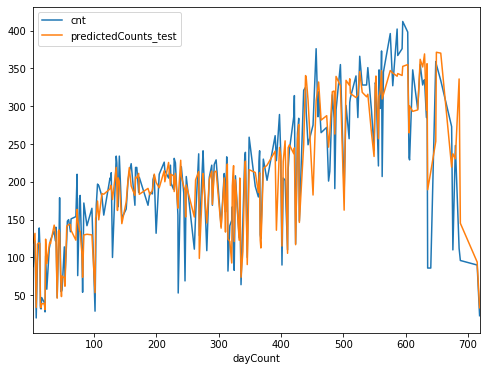

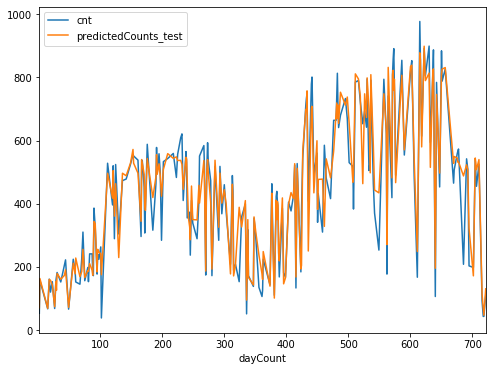

In [86]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()